<a href="https://colab.research.google.com/github/khancynthia28/DL-Spring2019-CNN/blob/master/All_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [0]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Activation, Convolution2D, GlobalAveragePooling2D, merge
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
from keras.models import Model
from keras.layers.core import Lambda
from keras.callbacks import ModelCheckpoint
import pandas
import cv2
import numpy as np

Using TensorFlow backend.


###Data Preprocessing

In [0]:
K.set_image_dim_ordering('tf')

batch_size = 32
nb_classes = 10
nb_epoch = 350


rows, cols = 32, 32

channels = 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

print (X_train.shape[1:])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

170500096/170498071 [==============================] - 15s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(32, 32, 3)


### Model Architecture

In [0]:
model = Sequential()

model.add(Convolution2D(96, 3, 3, border_mode = 'same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3, border_mode='same', subsample = (2,2)))
model.add(Dropout(0.5))

model.add(Convolution2D(192, 3, 3, border_mode = 'same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3,border_mode='same', subsample = (2,2)))
model.add(Dropout(0.5))

model.add(Convolution2D(192, 3, 3, border_mode = 'same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1,border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, 1, border_mode='valid'))



model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


print (model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), strides=(2, 2), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

### Fit Classifier

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) 

datagen.fit(X_train)
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

callbacks_list = [checkpoint]
    # Fit the model on the batches generated by datagen.flow().
history_callback = model.fit_generator(datagen.flow(X_train, Y_train,
                                     batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch, validation_data=(X_test, Y_test), callbacks=callbacks_list)


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1562, epochs=350)`


Epoch 1/350
1562/1562 [==============================] - 35s 22ms/step - loss: 1.9676 - acc: 0.2507 - val_loss: 1.6878 - val_acc: 0.3303

Epoch 00001: val_acc improved from -inf to 0.33030, saving model to weights.hdf5
Epoch 2/350
1562/1562 [==============================] - 30s 19ms/step - loss: 1.5349 - acc: 0.4302 - val_loss: 1.3102 - val_acc: 0.5207

Epoch 00002: val_acc improved from 0.33030 to 0.52070, saving model to weights.hdf5
Epoch 3/350
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2771 - acc: 0.5373 - val_loss: 1.1928 - val_acc: 0.5743

Epoch 00003: val_acc improved from 0.52070 to 0.57430, saving model to weights.hdf5
Epoch 4/350
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1045 - acc: 0.6055 - val_loss: 1.0120 - val_acc: 0.6349

Epoch 00004: val_acc improved from 0.57430 to 0.63490, saving model to weights.hdf5
Epoch 5/350
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9810 - acc: 0.6507 - val_loss: 0.8

### Result Plots

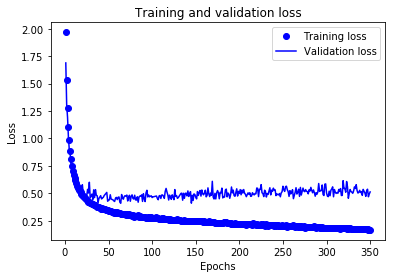

In [0]:
import matplotlib.pyplot as plt

history_dict = history_callback.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

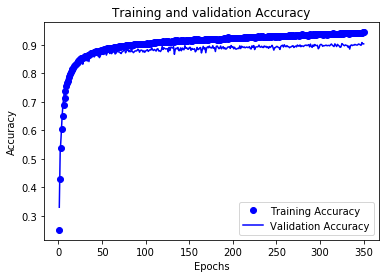

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()